In [1]:
# Import libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
'''
From postman, we have several urls called: the one bellow gives enough information for what we need
'''
url_site = 'https://www.topuniversities.com'
url_ranking = '/sites/default/files/qs-rankings-data/357051.txt?_=1508859120564'
req = requests.get(url_site + url_ranking)
data = req.json()['data'][:200]

In [24]:
'''
This function will get the value for the specified parameter in the html file (as a request)
'''
def getValue(request, parameter):
    soup = BeautifulSoup(request.text, 'html.parser')
    outer = soup.find('div', class_ = parameter)
    if (outer == None):
        #print('Error when looking for ' + parameter)
        return 'NaN'
    value = int(outer.find('div', class_ = 'number').text.replace(',', ''))
    return value

In [6]:
uniUrls = []
uniReq = []
for uni in data:
    uniUrls.append(uni['url'])
    uniReq.append(requests.get(url_site + uniUrls[-1]))

In [25]:
columns_name = ['Rank', 'Country', 'Region', 'Faculty members (total)', 'Faculty members (international)', 'Students (total)', 'Students (international)', 'Ratio between faculty members and students', 'Ratio of international students']
df = pd.DataFrame(columns = columns_name)

for index, uni in enumerate(data):
    rank = uni['rank_display'].replace('=', '')
    country = uni['country']
    region = uni['region']
    fac_members_total = getValue(uniReq[index], 'total faculty')
    fac_members_int = getValue(uniReq[index], 'inter faculty')
    students_total = getValue(uniReq[index], 'total student')
    students_int = getValue(uniReq[index], 'total inter')
    if (students_total != 'NaN' and fac_members_total != 'NaN' and students_int != 'NaN'):
        ratio_fac_students = students_total / fac_members_total
        percentage_int_students = students_int / students_total
    else:
        ratio_fac_students = 'NaN'
        percentage_int_students = 'NaN'
    df.loc[uni['title']] = [rank, country, region, fac_members_total, fac_members_int, students_total, students_int, ratio_fac_students, percentage_int_students]

df.drop(['New York University (NYU)'], inplace = True)


Error when looking for total faculty
Error when looking for inter faculty
Error when looking for total student
Error when looking for total inter
Error when looking for inter faculty


In [67]:
'''
This will plot the dataframe's column by university
'''
def plot_university(dataframe, column, max_n, ascending, ax, color):
    sorted_ = df.sort_values(column, ascending = ascending)[[column]]
    sorted_[column].head(max_n).plot(ax=ax, kind='bar', title=column, color=color)
    
'''
This will plot the dataframe's ratio of int students and ratio of fac members
'''
def plot_location(dataframe, location, max_n, ascending, ax1, ax2, color1, color2):
    table = df[[location, 'Faculty members (total)', 'Students (total)', 'Students (international)']].groupby([location]).sum(skipna = False)
    def ratio(x):
        return x[0] / x[1]
    int_stud = table[['Students (international)', 'Students (total)']].apply(ratio, axis = 1).sort_values(ascending = ascending)
    fac_memb = table[['Students (total)', 'Faculty members (total)']].apply(ratio, axis = 1).sort_values(ascending = ascending)
    int_stud.head(max_n).plot(ax=ax1, kind='bar', title='Ratio of international students', color=color1)
    fac_memb.head(max_n).plot(ax=ax2, kind='bar', title='Ratio between faculty members and students', color=color2)
    

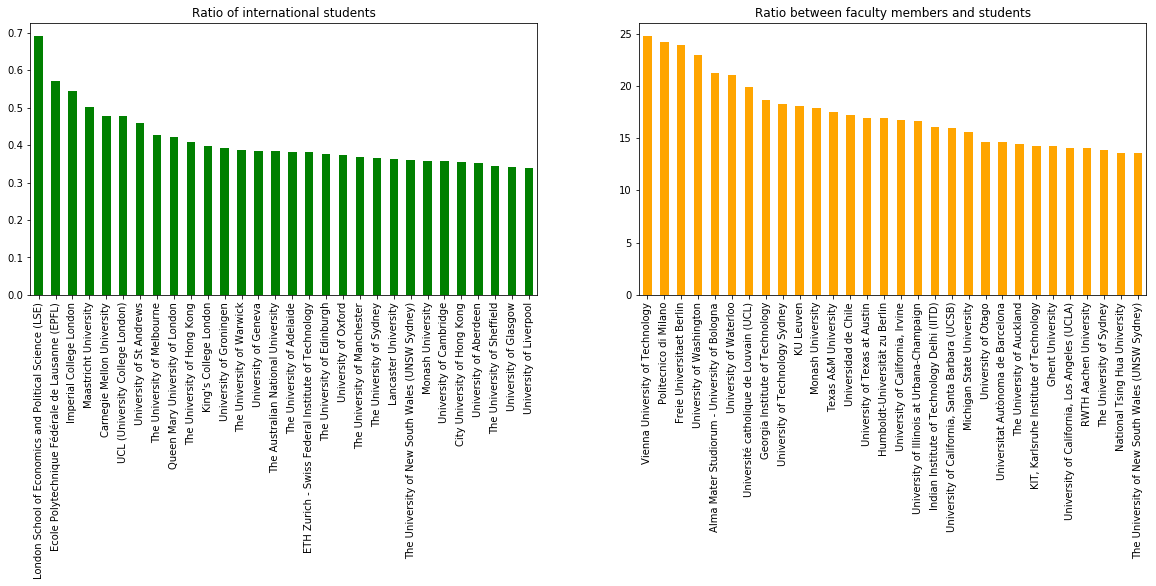

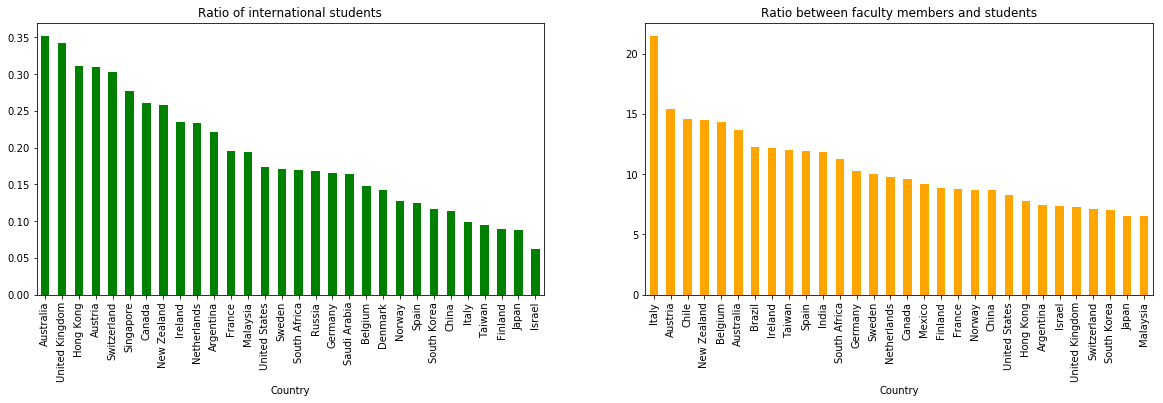

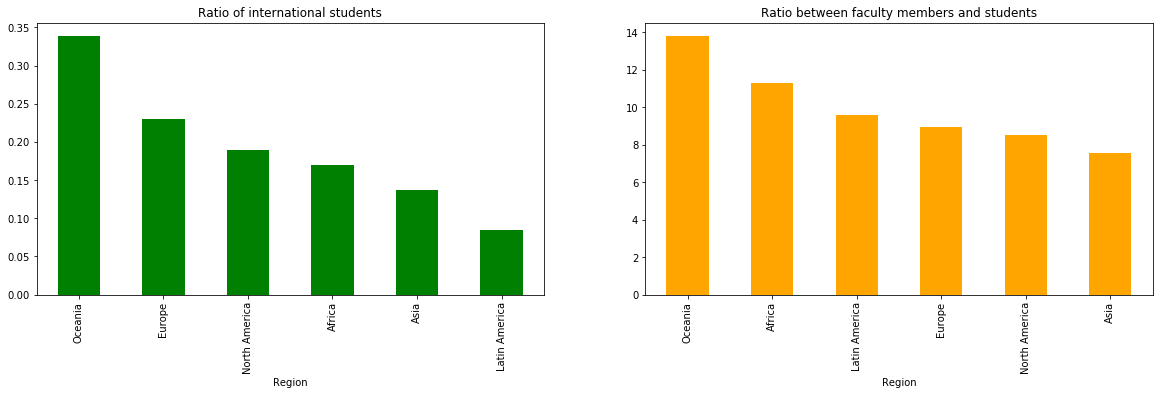

In [79]:
unused,subplots1 = plt.subplots(1,2, figsize=(20,5))
unused,subplots2 = plt.subplots(1,2, figsize=(20,5))
unused,subplots3 = plt.subplots(1,2, figsize=(20,5))

plot_university(df, 'Ratio of international students', 30, False, subplots1[0], 'green')
plot_university(df, 'Ratio between faculty members and students', 30, False, subplots1[1], 'orange')
plot_location(df, 'Country', 30, False, subplots2[0], subplots2[1], 'green', 'orange')
plot_location(df, 'Region', 30, False, subplots3[0], subplots3[1], 'green', 'orange')

In [81]:
'''
From postman, we have several urls called: the one bellow gives enough information for what we need
'''
url_site2 = 'https://www.timeshighereducation.com'
url_ranking2 = '/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json'
req2 = requests.get(url_site2 + url_ranking2)
data2 = req2.json()['data'][:200]

In [82]:
columns_name2 = ['Rank', 'Country', 'Faculty members (total)', 'Students (total)', 'Students (international)', 'Ratio between faculty members and students', 'Ratio of international students']
df2 = pd.DataFrame(columns = columns_name2)

for index, uni in enumerate(data2):
    rank = uni['rank'].replace('=', '')
    country = uni['location']
    ratio_fac_students = float(uni['stats_student_staff_ratio'])
    ratio_int_students = int(uni['stats_pc_intl_students'].replace('%', ''))/100
    students_total = int(uni['stats_number_students'].replace(',', ''))
    students_int = ratio_int_students * students_total
    fac_members_total = int(students_total / ratio_fac_students)
    df2.loc[uni['name']] = [rank, country, fac_members_total, students_total, students_int, ratio_fac_students, ratio_int_students]


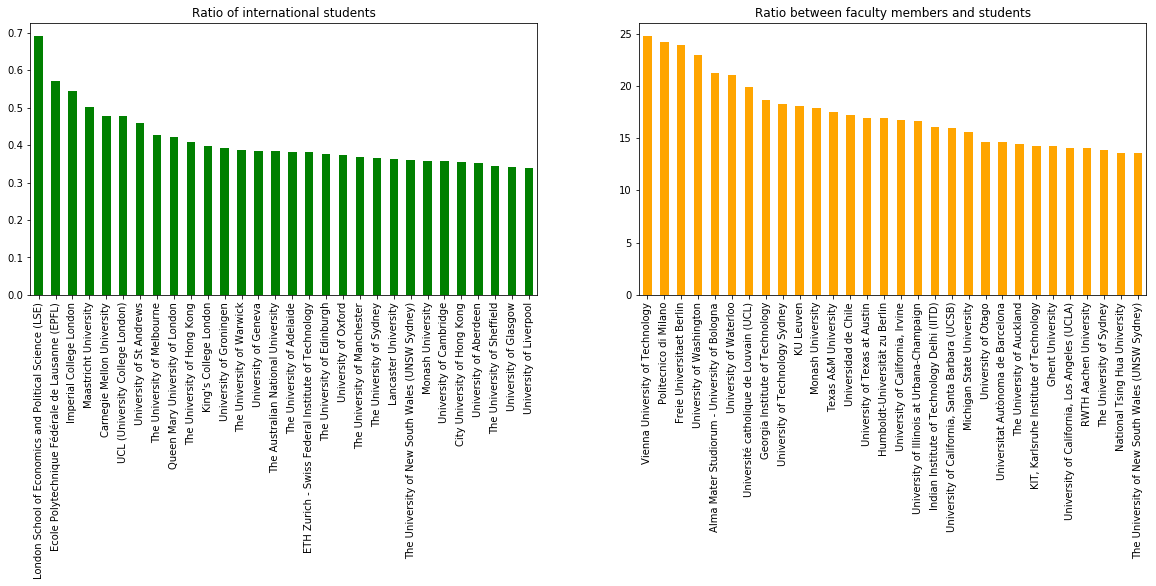

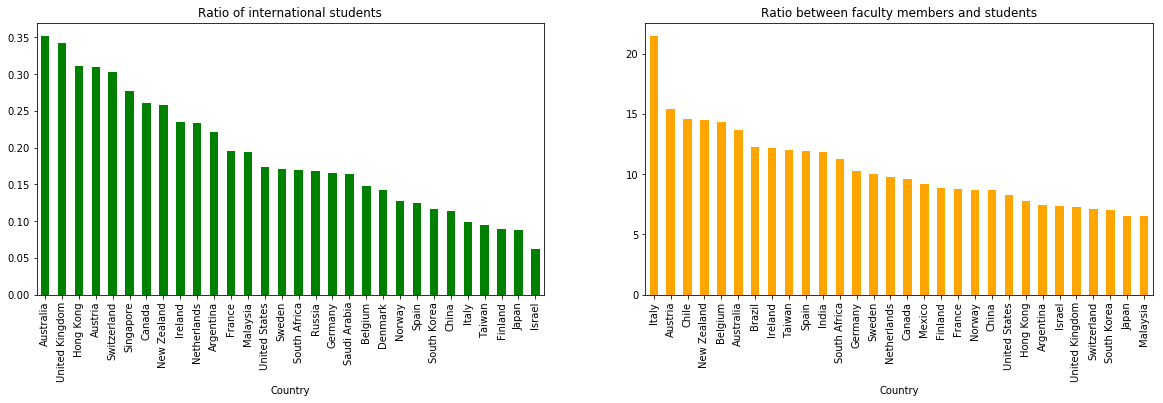

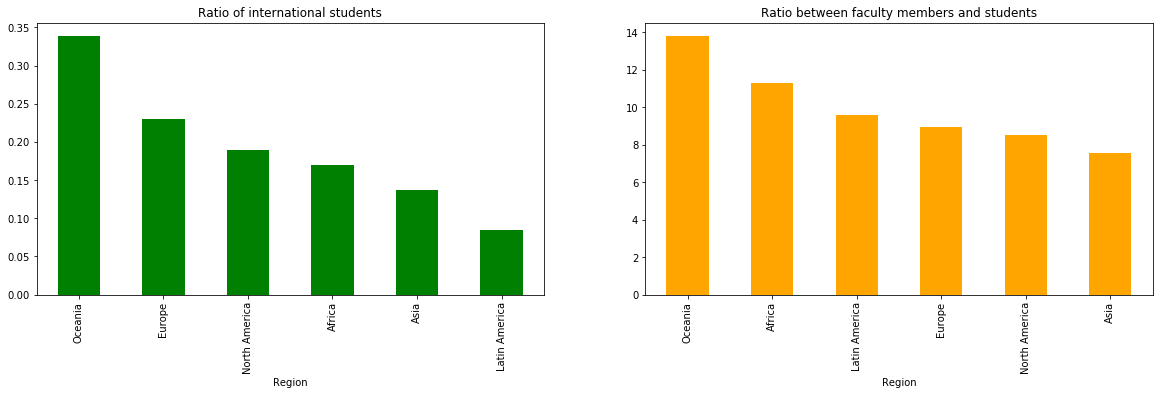

In [83]:
unused,subplots1 = plt.subplots(1,2, figsize=(20,5))
unused,subplots2 = plt.subplots(1,2, figsize=(20,5))
unused,subplots3 = plt.subplots(1,2, figsize=(20,5))

plot_university(df2, 'Ratio of international students', 30, False, subplots1[0], 'green')
plot_university(df2, 'Ratio between faculty members and students', 30, False, subplots1[1], 'orange')
plot_location(df2, 'Country', 30, False, subplots2[0], subplots2[1], 'green', 'orange')
plot_location(df2, 'Region', 30, False, subplots3[0], subplots3[1], 'green', 'orange')
